# Introduction
This project is based on the analysis performed on a dataset of students scores.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('student_scores.csv')

### Identifying Data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### No. of null values in each column

In [31]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### Dropping a column

In [32]:
df=df.drop('Unnamed: 0',axis=1)
# Column named Unnamed: 0 is removed from the dataframe

### Data Cleaning and Transformation

In [34]:
df['WklyStudyHours']=df['WklyStudyHours'].str.replace('5 - Oct','5 - 10')

In [35]:
df.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


# Gender Distribution

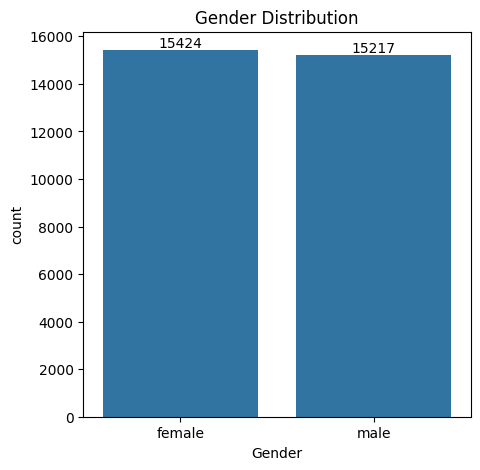

In [47]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x='Gender')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

**From the above chart we have found out that there is almost 1:1 ratio of male to female.**
**After further detailing we have discovered that there is actually a minor difference in both genders, female students are more than the male students after using the bar labels**

# Impact of Parent's education on student's scores

In [40]:
gb=df.groupby("ParentEduc").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


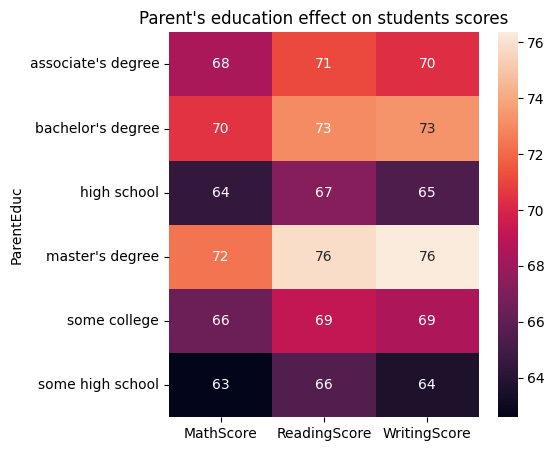

In [48]:
plt.figure(figsize=(5,5))
sns.heatmap(gb, annot=True)
plt.title("Parent's education effect on students scores")
plt.show()

**Through above analysis we can conclude that the highest average scores are scored by the students whose parents have education level of master's degree, meanwhile the lowest average scores are scored by the students whose parents have education level of some high school**

# Impact of Parent's marital status on student's scores

In [45]:
gb1=df.groupby("ParentMaritalStatus").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


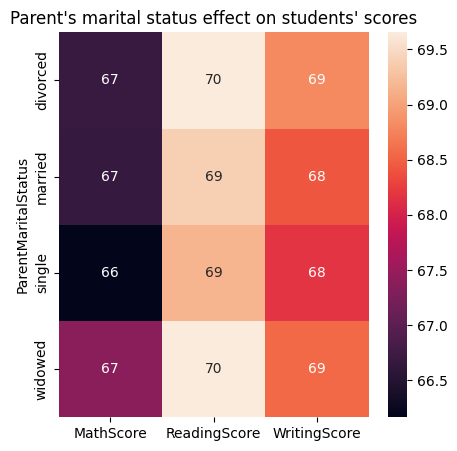

In [49]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("Parent's marital status effect on students' scores")
plt.show()

**Through the above chart we can conclude that the Parent's marital status does not necessarily impact students' scores**

# Identifying scores that are outliers

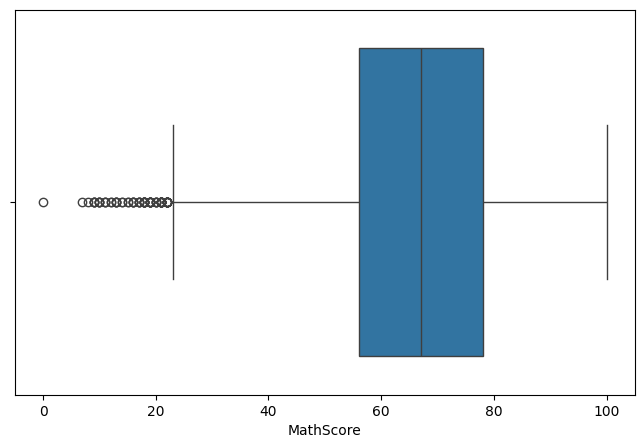

In [66]:
plt.figure(figsize=(8,5))
ax=sns.boxplot(data = df,x='MathScore')
plt.show()

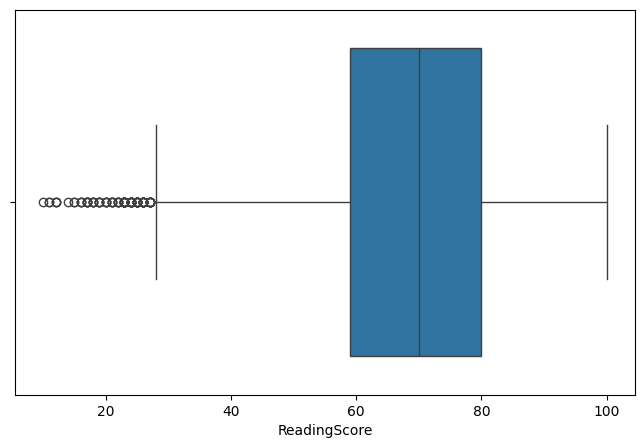

In [61]:
plt.figure(figsize=(8,5))
ax=sns.boxplot(data = df,x='ReadingScore')
plt.show()

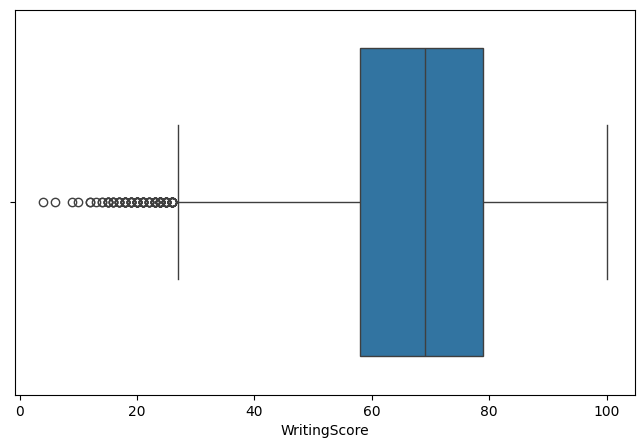

In [62]:
plt.figure(figsize=(8,5))
ax=sns.boxplot(data = df,x='WritingScore')
plt.show()

**With help of above three charts we can conclude that the math scores have the most outliers out of the three**

# Distribution of Ethnic Groups

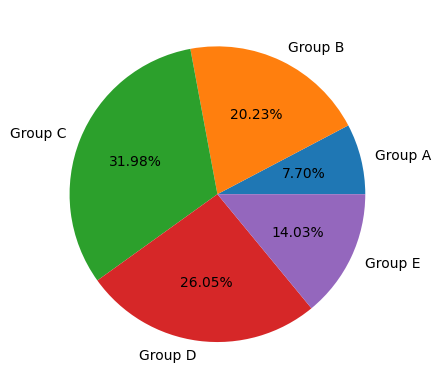

In [72]:
groupA=df.loc[(df['EthnicGroup']=='group A')].count()
groupB=df.loc[(df['EthnicGroup']=='group B')].count()
groupC=df.loc[(df['EthnicGroup']=='group C')].count()
groupD=df.loc[(df['EthnicGroup']=='group D')].count()
groupE=df.loc[(df['EthnicGroup']=='group E')].count()

l=['Group A','Group B','Group C','Group D','Group E']
mlist=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(mlist, labels=l,autopct='%1.2f%%')
plt.show()

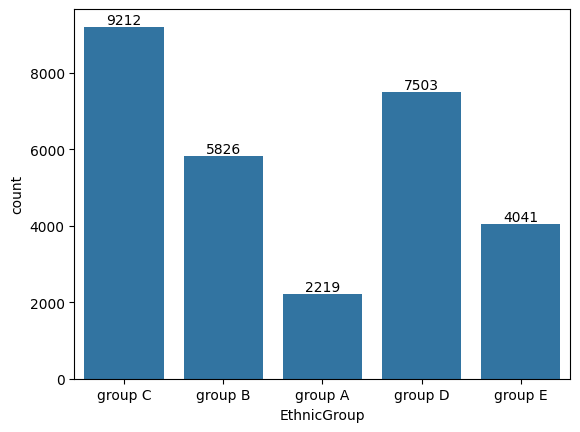

In [74]:
ax=sns.countplot(data=df,x='EthnicGroup')
ax.bar_label(ax.containers[0])
plt.show()

***From above charts we have uncovered the information that the most students belong to the ethnic group C and least belong to the ethnic group A***

# Analysis Conclusion Report
**This is a mini data analysis project performed on a students scores dataset** \
**This dataset can be found**
[here](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores) \
***Through this analysis we can find out important details about students.***  
***Testing and observing students can become much more easier***

# Tools and Sources used
- Python
- Numpy
- Pandas
- Matplotlib
- Seaborn
- [Kaggle](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores)
- Jupyter Notebook
- VS code